<a href="https://colab.research.google.com/github/donib-irakihda/fuse-assignments/blob/main/RegularizationAssignment_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Motorcycle Price Prediction

In this assignment you will implement a number of linear regression models to predict the price of a used motorcycle given its different features and perform necessary evaluations to check the model performance.

<b><div style="text-align: right">[TOTAL POINTS: 15]</div></b>

### Learning Objective

* Test the assumptions of linear regression and transform the dataset accordingly if necessary.

* Use the sklearn library to implement linear reression, ridge regression and lasso and evaluate their and calculate their $R^2$ score. 

* Implement and use the adjusted $R^2$ score to evaluate the performance of models with varying set of features.

* Implement the Ordinary Least Squares and Gradient descent method from scratch to find the parameters of Linear Regression.






## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import itertools

np.random.seed(42)

## Dataset Description

The dataset contains 500 samples of used motorcycle with some of their features and their resale value. The problem here is to predict the resale value of the motorcycle using its features. 

**Number of Instances:** 500

**Number of Attributes:** 5 (Input Features) + 1 (Target)



### Attribute Information

#### **Input Features**
All the feature values have already been scaled to a similar range so that you won't have to apply feature scaling.

- **Lot No.:** Lot number of the motorcycle. Higher Lot number signifies newer motorcycle.

- **Engine Size:** Size of the eingine of the motorcycle.

- **Mileage:** Measure of how long the motorcycle runs for a litre of gas.

- **KM Run:** Kilometers run on the motorcycle.

- **Max Power:** Maximum power output of the motorcycle.

\

#### **Target Variable**

- **Price:** Resale value of the motorcycle in thousands. Our target variable.


In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?id=1zeE911284qKNF1q2mgoIgOa4UXYC9N2i')
X = dataset.drop('Price', axis=1).values
y = dataset['Price'].values.reshape(X.shape[0],1)
dataset.head()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
0,0.056646,-1.043517,0.797331,-0.222694,-1.863743,45.026610
1,0.238778,-0.417864,0.000508,0.866960,-0.312565,39.300833
2,-1.492397,0.936633,0.785432,-0.091035,2.423967,58.923446
3,1.132288,-0.583562,0.790543,1.262054,-1.121522,52.101286
4,1.318906,2.024895,0.996975,1.427730,4.410519,79.322492


Let's first calculate the residuals by quickly fitting the linear regression on the whole data using sklearn.

In [ ]:
## RUN THIS CELL
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
residuals = model.predict(X) - y

## Part 1: Assumptions

### Exercise 1.1: Check for multicollinearity


**<div style="text-align: right"> [POINTS: 1]</div>**


**Task:**

* Import the [`variance_inflation_factor`]() from `statsmodels` library.

* Calculate the VIF score for each of the features using the `variance_inflation_factor` function.

In [ ]:
### Ex-1-Task-1
VIF = None

### BEGIN SOLUTION
# your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
# raise NotImplementedError
### END SOLUTION

print(VIF)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[1.0087076423300199, 12.616827778300836, 1.0089247045274492, 1.010388194748689, 12.603910494981058]


In [ ]:
assert VIF is not None
assert len(VIF) == X.shape[1]

**Removing Multicollinearity**

In [ ]:
### RUN THIS CELL
X = np.delete(X, 4, 1)

### Exercise 1.2: Check for Homoscedasticity

**<div style="text-align: right"> [POINTS: 1]</div>**

**Task:**
- Assign the appropriate value for the `x_axis` and `y_axis` to plot the scatterplot of the samples (x-axis) and their corresponding residuals (y-axis).

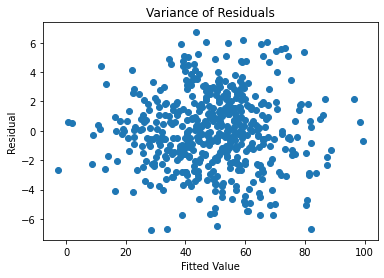

In [8]:
### Ex-1-Task-2
x_axis = None
y_axis = None

### BEGIN SOLUTION
# your code here
model = LinearRegression().fit(X, y)
x_axis = model.predict(X)
y_axis = model.predict(X) - y
# raise NotImplementedError
### END SOLUTION

plt.scatter(x=x_axis, y=y_axis)
plt.title('Variance of Residuals')
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

In [9]:
assert max(x_axis) == 499
assert len(y_axis) == 500

AssertionError: ignored

### Exercise 1.3: Check for Auto-correlation

**<div style="text-align: right"> [POINTS: 1]</div>**


**Task:**

* Import the [`durbin_watson`]() from `statsmodels` library.

* Calculate the `durbin_watson_score` of the residuals using the `durbin_watson` function.

In [10]:
### Ex-1-Task-3

durbin_watson_score = None

### BEGIN SOLUTION
# your code here
from statsmodels.stats.stattools import durbin_watson
durbin_watson_score = durbin_watson(residuals)
# raise NotImplementedError
### END SOLUTION

print(durbin_watson_score)

[2.07164064]


In [11]:
assert durbin_watson_score is not None
assert durbin_watson_score >= 1.5

### Exercise 1.4: Check for Normality of residuals

**<div style="text-align: right"> [POINTS: 1]</div>**

**Task:**

* Import the [`normal_ad`]() from `statsmodels` library.

* Calculate the `p_value` of the residuals using the `normal_ad` function.

In [12]:
### Ex-1-Task-4

p_value = None

### BEGIN SOLUTION
# your code here
from statsmodels.stats.diagnostic import normal_ad
p_value = normal_ad(residuals, axis=0)[1]
# raise NotImplementedError
### END SOLUTION

print(p_value)

[0.85673401]


In [13]:
assert p_value is not None
assert p_value >= 0.5


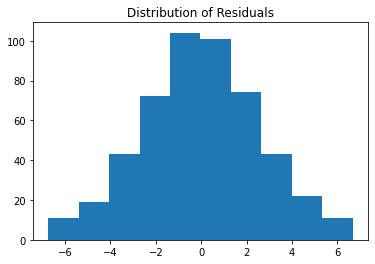

In [14]:
### RUN THIS CELL
plt.title('Distribution of Residuals')
plt.hist(residuals)
plt.show()

## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Part 2: Implementation using Sklearn

In this section, you will implement and validate linear regression using sklearn. You will use the easy and quick interface of sklearn to try out models with different combinations of the features and select the best combination of features using the Adjusted $R^2$ score. 

### Exercise 2.1: Adjusted $R^2$

**<div style="text-align: right"> [POINTS: 1]</div>**

The sklearn library has a number of functions to calculate different performance metrics but it misses out on the adjusted $R^2$ score. So in this section you will implement the function `adjusted_r2_score` that computes adjusted $R^2$ score for a model.

Recall: $$\text{Adjusted}\ {R^2} = 1- (1-R^2)\frac{n-1}{n-d-1}$$

\

**Tasks:** Complete the function `adjusted_r2_score` by computing the adjusted $R^2$ score.

* Compute the $R^2$ score using the `r2_score` function from sklearn and store it in `r2`.

* Compute the adjusted $R^2$ using the previously calculated $R2$ and store it in `adj_r2`. 

In [17]:
### Ex-2-Task-1

def adjusted_r2_score(y_test, y_pred):
    n = X.shape[0]
    d = X.shape[1]

    r2 = None
    adj_r2 = None

    ### BEGIN SOLUTION
    # your code here
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1-r2) *(X.shape[0]-1) / (X.shape[0]- X.shape[1] - 1))
    # raise NotImplementedError
    ### END SOLUTION

    return adj_r2

In [18]:
# Tests
np.random.seed(42)
y_test_test = np.random.randn(12,1)
y_pred_test = y_test_test + 1

assert (adjusted_r2_score(y_test_test,y_pred_test)) <= 0


### Exercise 2.2: Linear Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`LinearRegression`]() class from sklearn to build a number of linear regression models. Each model will use a particular combination of the available features. You will calculate the adjusted $R^2$ score of each of these models and see which particular combination of the features is the best.


**Tasks:** 

* Instantiate an object `linear_regression` of the `LinearRegression` class.

* Fit the object `linear_regression` on the temporary training set `X_train_temp`.

* Use the fitted `linear_regression` object to predict the output of the temporary test set `X_test_temp`. Store the predicted values in the variable `y_pred`.

* Calculate the adjusted $R^2$ score for the model using the `adjusted_r2_score` you defined earlier and store it in `adj_r2`.


In [19]:
### Ex-2-Task-2

# Creating random combinations of the features
features_combinations = []
for L in range(1, X.shape[1]+1):
    for subset in itertools.combinations(range(X.shape[1]), L):
        features_combinations.append(list(subset))

models = dict() # dictionary to store the parameters of different models
models_r2 = dict() # dictionary to store the different model's adjusted r2 score 

for features in features_combinations:
    X_train_temp = X_train[:, features]
    X_test_temp = X_test[:, features]
    
    linear_regression = None
    y_pred = None
    adj_r2 = None

    ### BEGIN SOLUTION
    # your code here
    linear_regression = LinearRegression().fit(X_train_temp, y_train)
    y_pred = linear_regression.predict(X_test_temp)
    adj_r2 = adjusted_r2_score(y_test, y_pred)
    # raise NotImplementedError
    ### END SOLUTION

    models[str(features)] = np.c_[linear_regression.intercept_, linear_regression.coef_]  
    models_r2[str(features)] = adj_r2

print("Different linear regression models and their adjusted r2 score")
for key in models_r2.keys():
  print("{}: {}".format(key, models_r2[key]))
best = max(models_r2, key=models_r2.get)
print("Best model: {} Parameters: {}".format(best, models[best])) 

Different linear regression models and their adjusted r2 score
[0]: 0.13597227419511837
[1]: 0.28115541233078767
[2]: 0.2633809572031648
[3]: 0.21390197274217138
[0, 1]: 0.4196704828783977
[0, 2]: 0.47488637964989744
[0, 3]: 0.3557706439289614
[1, 2]: 0.6185596495462227
[1, 3]: 0.5037594011669295
[2, 3]: 0.4073443406712831
[0, 1, 2]: 0.8404117424466044
[0, 1, 3]: 0.639217851526068
[0, 2, 3]: 0.6165822910055553
[1, 2, 3]: 0.7555098315924497
[0, 1, 2, 3]: 0.9744322614168767
Best model: [0, 1, 2, 3] Parameters: [[50.25299626  7.25576172  9.57649649 10.0929504  -6.006947  ]]


In [20]:
assert adj_r2 is not None
assert round(adj_r2, 2) == 0.97



### Exercise 2.3: Ridge Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`Ridge`]() class from sklearn to build a ridge regression model. You will use all 4 features as you have seen that they result in the best adjusted $R^2$.

**Tasks:** 

* Import the  `Ridge` class from sklearn and instantiate the class as `ridge_regression`.

* Fit the object `rige_regression` on the  training set `X_train`.

* Use the fitted `rige_regression` object to predict the output of the  test set `X_test`. Store the predicted values in the variable `y_pred`.

* Calculate the $R^2$ score for the model using the [`r2_score`]() function from sklearn and store it in `r2`.



In [22]:
### Ex-2-Task-3

ridge_regression = None
y_pred = None
r2 = None

### BEGIN SOLUTION
# your code here
from sklearn.linear_model import Ridge
ridge_regression = Ridge().fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
# raise NotImplementedError
### END SOLUTION

print("R2 score for Ridge Regression: ",r2)
print("Parameters: ", np.c_[ridge_regression.intercept_, ridge_regression.coef_])

R2 score for Ridge Regression:  0.9746516523387053
Parameters:  [[50.2498614   7.23318567  9.54305159 10.06760406 -5.98829548]]


In [23]:
assert round(r2, 2) == 0.97
assert hasattr(ridge_regression, 'intercept_')


### Exercise 2.4: LASSO Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`Lasso`]() class from sklearn to build a lasso regression model. You will use all 4 features as you have seen that they result in the best adjusted $R^2$.

**Tasks:** 

* Import the  `Lasso` class from sklearn and instantiate the class as `lasso_regression`

* Fit the object `lasso_regression` on the temporary training set `X_train_temp`.

* Use the fitted `lasso_regression` object to predict the output of the temporary test set `X_test_temp`. Store the predicted values in the variable `y_pred`.

* Calculate the $R^2$ score for the model using the [`r2_score`]() function from sklearn and store it in `r2`.



In [26]:
### Ex-2-Task-4

lasso_regression = None
y_pred = None
r2 = None

### BEGIN SOLUTION
# your code here
from sklearn.linear_model import Lasso
lasso_regression = Lasso().fit(X_train_temp, y_train)
y_pred = lasso_regression.predict(X_test_temp)
r2 = r2_score(y_test, y_pred)
# raise NotImplementedError 
### END SOLUTION

print("R2 score for Lasso Regression: ",r2)
print("Parameters: ", np.r_[lasso_regression.intercept_, lasso_regression.coef_])
# lasso.coef_
# np.r_[lasso.intercept_, lasso.coef_]

R2 score for Lasso Regression:  0.9593772902521192
Parameters:  [50.11608472  6.20152152  8.29754509  9.21974979 -4.94071203]


In [27]:
assert round(r2, 2) == 0.96
assert hasattr(lasso_regression, 'intercept_')


## Part 3: Implementation from Scratch

In this section, you will implement the OLS and Gradient descent algorithm from scratch to learn the parameters of the linear regression model. But first let's add the column of ones for intercept in the training and test set.

In [28]:
### RUN THIS CELL
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

### Exercise 3.1: Linear Regression using OLS

**<div style="text-align: right"> [POINTS: 1]</div>**

In this exercise, you will implement the normal equation of OLS to find the parameters of Linear regression.

Recall: $$\boldsymbol{\beta} =(\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$$

\\

**Task:**

* Complete the function `normal_equation` by implementing the normal equation to find the parameters `betas`.

In [29]:
### Ex-3-Task-1
def normal_equation(X,y):

    betas = None
    ### BEGIN SOLUTION
    # your code here
    betas = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    # raise NotImplementedError
    ### END SOLUTION

    return betas

model_OLS = normal_equation(X_train,y_train)
print("Parameters: ", model_OLS.reshape(1,-1))

Parameters:  [[50.25299626  7.25576172  9.57649649 10.0929504  -6.006947  ]]


In [30]:
assert max(model_OLS) >=50

### Exercise 3.2: Linear Regression using Gradient Descent
**<div style="text-align: right"> [POINTS: 3]</div>**

In this exercise, you will mplement the gradient descent algorithm to find the parameters of linear regression.

**Tasks:** Complete the following function to implement the gradient descent algorithm.

* Initialize `betas` randomly from values sampled from normal distribution

* Calculate the `gradients` for the `betas`. $[\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y})]$ 

* Update the `betas` using their `gradients`.$[\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \boldsymbol{\frac{\partial J}{\partial \beta}}]$

* Calculate the cost for the `betas` using the Linear Regression's cost function. $[J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2]$



In [31]:
### Ex-3-Task-2
def gradient_descent(X, y, alpha=0.0001 , max_iters=10000, precision = 1e-3):
    np.random.seed(0)
    n = X.shape[0]
    d = X.shape[1]

    iteration = 0 # no. of iterations
    difference = 1 # difference between the cost of current iteration and previous iteration
    costs = [1e12] # list containing the history of costs for different iterations 

    betas = None
    gradients = None
    cost = None

    # Initialize betas
    
    betas = np.random.randn(d,1)
   

    while difference > precision and iteration <= max_iters :

        # Calculate gradients
        
        # Update betas
        
         # Calculate cost
        
        ### BEGIN SOLUTION
        # your code here
        gradients = np.dot(X.T, (np.dot(X, betas) - y))
        betas -= alpha * gradients
        cost = (1/2) * np.sum((np.dot(X, betas) - y) ** 2)
        # raise NotImplementedError
        ### END SOLUTION

        difference = np.abs(costs[iteration] - cost) 
        costs.append(cost)

        iteration += 1

        if(cost == np.infty):
            print("Cost reached infinity, try smaller learning rate")
            break

    return betas, iteration, costs

model_GD, steps, costs = gradient_descent(X_train, y_train, alpha=0.0007)
print("Parameters: ", model_GD.reshape(1,-1))

Parameters:  [[50.25119387  7.2551767   9.57419738 10.09292409 -6.00535143]]


In [32]:
assert steps >=41
assert min(costs) < 1150

## Well done!